## Mask R-CNN - Evaluation Mode - Simulate the `Detection Layer` Process for COCO images

We generate the inputs to `DetectTargetLayer` , to manipulate and modify the layer to procduce a modified `output_rois` 
containing false positives. 
This will be passed on the the heatmap layer, and through there will become the input to FCN.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
from mrcnn.prep_notebook import build_coco_config, get_image_batch
from mrcnn.prep_notebook import build_mrcnn_inference_pipeline, run_mrcnn_inference_pipeline, get_inference_batch
from mrcnn.prep_notebook import build_mrcnn_evaluate_pipeline, run_mrcnn_evaluate_pipeline, get_evaluate_batch
from mrcnn.prep_notebook import build_mrcnn_evaluate_pipeline_newshapes
from mrcnn.visualize     import display_training_batch
from mrcnn.coco          import prep_coco_dataset
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.datagen       import data_gen_simulate

Current working dir:  E:\git_projs\MRCNN3\notebooks
appending '..' to sys.path


Using TensorFlow backend.


###  Build Newshapes model 

In [3]:
input_parms  =" --batch_size     1  "
# input_parms +=" --mrcnn_logs_dir train_mrcnn_coco_subset "
# input_parms +=" --fcn_logs_dir   train_fcn8_subset " 
# input_parms +=" --coco_classes   10 11 13 14 15  34 35 36 37 38 39 40 41 42 43  44 46 47 48 49 50 51  78 79 80 81 82"
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --fcn_logs_dir   train_fcn8_l2_newshapes " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --scale_factor   1"
input_parms +=" --sysout         screen "
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
# mrcnn_config, args = build_coco_config('mrcnn','evaluate', args, verbose = 1)                                

# mrcnn_model = build_mrcnn_evaluate_pipeline(args = args, verbose = 1)
mrcnn_model = build_mrcnn_evaluate_pipeline_newshapes(args = args, verbose = 1)


--> Execution started at: 01-29-2019 @ 20:36:56
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 
    Build_mrcnn_inference_pipeline_newshapes MODE is : evaluate

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN32
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   1
   steps_in_epoch      

    >> input to MVN.PROB: pos_grid (meshgrid) shape:  (128, 128, ?, 2)
     Prob_grid shape from mvn.probe:  (128, 128, ?)
     Prob_grid shape after tanspose:  (?, 128, 128)
    << output probabilities shape  :  (?, 128, 128)
    old_style_scores        : (1, 7, 64, 3) (1, 7, 64, 3)
    prob_grid_clipped :  (?, 128, 128)

    normalization ------------------------------------------------------
    normalizer     :  (?, 1, 1)
    prob_grid_cns: clipped/normed/scaled :  (?, 128, 128)
    alt_scores_1    :  (None, 3)  Keras tensor  False
    alt_scores_1(by class)       :  (1, 7, 64, 3)  Keras tensor  False
    alt_scores_1_norm(by_class)  :  (1, 7, 64, 3) (1, 7, 64, 3)

    Scatter out the probability distributions based on class --------------
    pt2_ind shape      :  (?, 3)
    prob_grid_clippped :  (?, 128, 128)
    gauss_heatmap      :  (1, 7, 64, 128, 128)

    Reduce SUM based on class and normalize within each class -------------------------------------
    gaussian_heatmap_sum 

###  Build COCO model 

In [3]:
input_parms = " --batch_size 1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco_subset "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE_subset "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   4"
input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())

mrcnn_model = build_mrcnn_evaluate_pipeline(args = args, verbose = 1)


--> Execution started at: 01-28-2019 @ 10:47:57
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 
>>> Initialize Paths
 windows  Windows

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE_subset
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco_subset
   mrcnn_model                    last
   new_log_folder                 False
   opt                

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\PretrainedModels\\coco_class_stats_info.pkl'

In [28]:
mrcnn_model.class_pred_stats
# mrcnn_model.config.display()
# mrcnn_model.display_layer_info()

{'avg': [0.0, 0.936, 0.9476, 0.9898, 0.9582, 0.9749, 0.9827],
 'pct': [[0.0, 0.0, 0.0],
  [0.972, 0.9978, 0.9995],
  [0.9984, 0.9998, 0.9999],
  [0.9992, 0.9996, 0.9998],
  [0.9984, 0.9999, 1.0],
  [0.9969, 0.9995, 0.9998],
  [0.9972, 0.9994, 0.9998]]}

## Set and load weight files

In [15]:
MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'

# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0058.h5', 'mrcnn_0152.h5', 'mrcnn_0247.h5', 'mrcnn_0389.h5','mrcnn_0472.h5']

FILE_IDX = 0
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000\mrcnn_0001.h5
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000\mrcnn_0001.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000\mrcnn_0001.h5
    Weights file loaded: F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000\mrcnn_0001.h5 
MRCNN  MODEL Load weight file COMPLETE 


###  FCN Weights 

In [3]:
# DIR_WEIGHTS = '/home/kbardool/models/train_fcn8_coco/fcn20181026T1432'
# DIR_WEIGHTS =  'F:/models/train_fcn8_bce/fcn20181205T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# DIR_WEIGHTS =  '/home/kbardool/models/train_fcn8_coco/fcn20181031T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']

fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
             'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
             'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
             'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
              'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']
FILE_IDX = 6
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5 
FCN  MODEL Load weight file COMPLETE 


## Load Training dataset

###  Coco

In [ ]:
##------------------------------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets  loadAnns='active_only' | 'all_classes'
## train  : 82081 |  train + val35k : 117266 | val    : 40137 | val35k : 35185 |  minival:  4952
##------------------------------------------------------------------------------------------------------------ 
#   'accessory':   [27, 28, 31, 32, 33],          # 'animal':     [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
#   'appliance':  [78, 79, 80, 81, 82],           # 'background': [0],
#   'electronic': [72, 73, 74, 75, 76, 77],       # 'food':       [52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
#   'furniture':  [62, 63, 64, 65, 67, 70],       # 'indoor':     [84, 85, 86, 87, 88, 89, 90],
#   'kitchen':    [44, 46, 47, 48, 49, 50, 51],   # 'outdoor':    [10, 11, 13, 14, 15],
#   'person':     [1],                            # 'sports':     [34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
#   'vehicle':    [2, 3, 4, 5, 6, 7, 8, 9]} 
## " --coco_classes:
##    appliance : 78 79 80 81 82                  kitchen: 44 46 47 48 49 50 51 
##    sports    : 34 35 36 37 38 39 40 41 42 43   indoor : 10 11 13 14 15
##------------------------------------- -----------------------------------------------------------------------
dataset_train, train_generator = prep_coco_dataset(["train", 'val35k'], mrcnn_model.config, generator = True, shuffle = False,load_coco_classes=args.coco_classes, 
#                                                   loadAnns = 'all_classes'
                                                   loadAnns='active_only')
class_names = dataset_train.class_names

### Shapes

In [4]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000.pkl", 'rb') as infile:
with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl", 'rb') as infile:
    dataset_train = pickle.load(infile)

In [13]:
dataset_train.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_train.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_train.num_classes))
print(len(dataset_train.image_ids))    
class_names = dataset_train.class_names

[1, 2, 3, 4, 5, 6]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
Testing Dataset Image Count: 10000
Testing Dataset Class Count: 7
10000


In [ ]:
# pp.pprint(dataset_train.category_to_class_map)
# pp.pprint(dataset_train.category_to_external_class_map)
# print(' dataset_train.source_objs:   ',dataset_train.source_objs)
# print(dataset_train.image_info[0].keys())
# for i in range(10):
#     p = dataset_train.image_info[i]
#     print(i,p['id'], p['source'], p['path'])
# pp.pprint(dataset_train.ext_to_int_id)
# pp.pprint(dataset_train.int_to_ext_id)
# for i, info in enumerate(dataset_test.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

## Display Images

###  Display some images from dataset

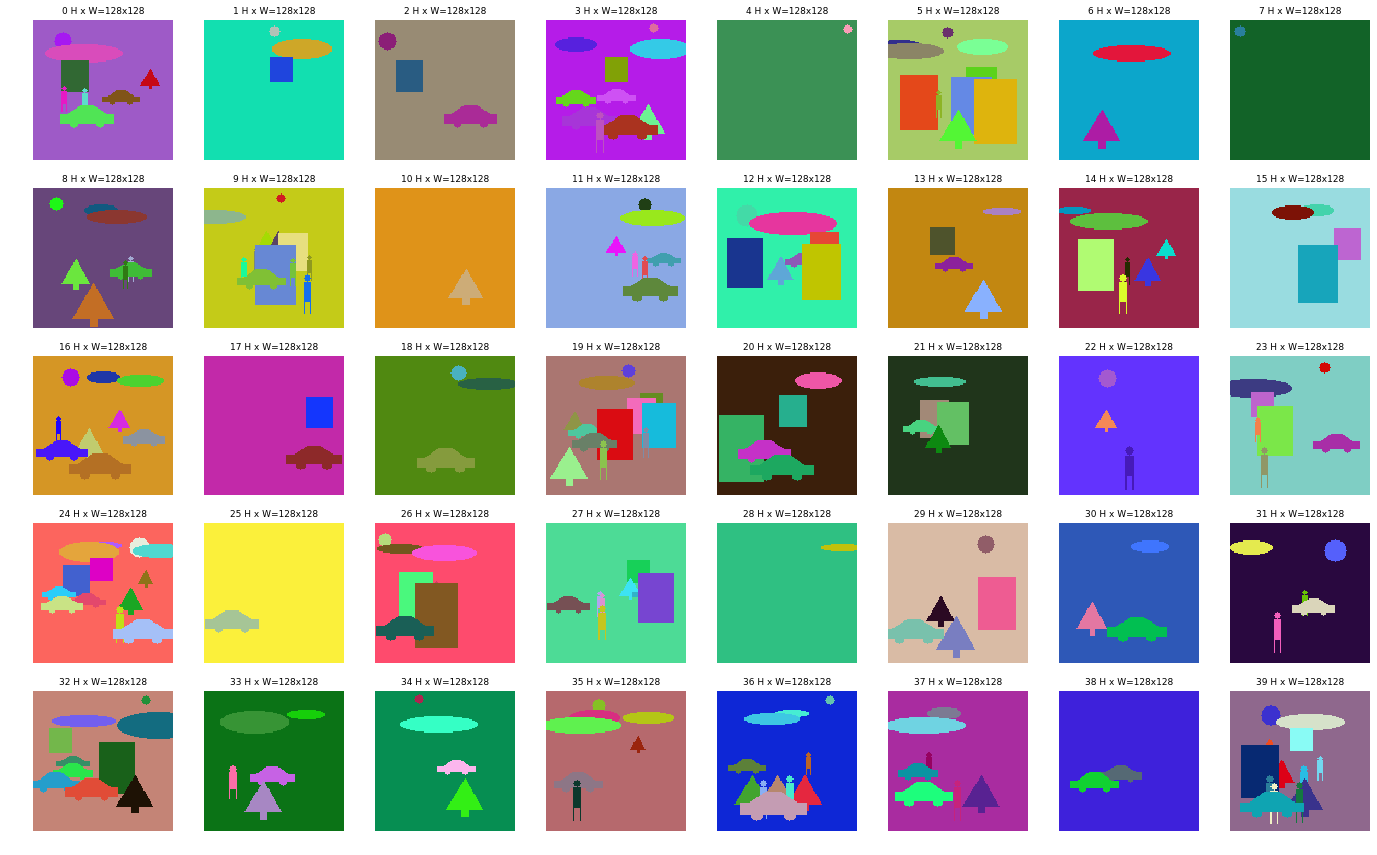

In [5]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_train, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

### Load a specific image using image_id -Display image with Ground Truth bounding boxes and masks

In [ ]:
# IMAGE_LIST = [62642] (persons),   
# IMAGE_LIST = [68539] (trucks) 
# IMAGE_LIST = [36466] (surfers)  
# IMAGE_LIST = [75040] (boat and persons)
# IMAGE_LIST = [36466] surfers. 5498 basketbal players, 27711,30531
# IMAGE_LIST = [5498] lots of motorcylces & persons - 
# IMAGE_LIST = [26026, #7719, 111864, 58240]  ## persons
# IMAGE_LIST = [35347] - laptops, keyboards and cat
# IMAGE_LIST = [59199 , 102868]
# IMAGE_LIST = [89243] : Person, bicylce and traiffic lights
# IMAGE_LIST = [101623] (cake and forks), 41423 (elephant & people)
# IMAGE_LIST = [33477] Table, bowl, cup, sandwich, knife
# IMAGE_LIST = [26763] Table, chair, cup , bowl, bottle
# IMAGE_LIST = [49316] Table, book, backpack, many bottles
# IMAGE_LIST = [12902] Car , truck and traffic light tree
# IMAGE_LIST = [57327] person and horses
# IMAGE_LIST = [26026] -- mountain, skiers, skiboards 
# IMAGE_LIST = [7719] -- people, bottles, handbags
# IMAGE_LIST = [27711] -- persons and boats
# IMAGE_LIST = [18045] -- person     
# IMAGE_LIST = [36769] -- people in meeting room with a 'giraffe'detection?
# IMAGE_LIST = [8634] -- person
# IMAGE_LIST = [30531] -- tennis players 
# IMAGE_LIST = [8645] -- two people
# IMAGE_LIST = [75040] 
# IMAGE_LIST = [89243]
# IMAGE_LIST = [33477]
# IMAGE_LIST = [29731]   ## max overlap 0.65
# IMAGE_LIST = [26763]
# IMAGE_LIST = [89243]  ## 89243: Person, bicylce and traiffic lights
# IMAGE_LIST = [43168]   ## 43168 Multiple umbrella, chairs, beds
# IMAGE_LIST = [30531]
# IMAGE_LIST = [11]
# IMAGE_LIST = [30533]
# train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, generator = train_generator )

## ## high overlaps:   33491, 33498, 33499,
# train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, image_ids = 33499)
train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, image_ids = 800)

# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_LIST)
# visualize.display_training_batch(dataset_train, train_batch_x)
# dataset_train.display_annotation_info(IMAGE_LIST)
 

###  Other display image methods

#### `get_evaluate_batch()`

In [ ]:
# print(train_batch_x[0].shape)
# visualize.display_image(utils.unmold_image(batch_x[0][0], mrcnn_model.config))
# train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, generator = train_generator)
# print(len(train_batch_x))
# for i in train_batch_x[0]:
#     print('image shape:', i.shape)
# for i in train_batch_x[1:]:
#     print(i.shape)
# # gt_boxes = train_batch_x[4][0]
# gt_class_ids = train_batch_x[3][0]
# print('gt_class_ids: \n', gt_class_ids)
# # visualize.display_instances(train_batch_x[1][0], gt_boxes, gt_class_ids, class_names = class_names)
# visualize.display_training_batch(dataset_train, train_batch_x[1:])

#### Load using next(generator)

In [ ]:
train_batch_x, _ = next(train_generator)
display_training_batch(dataset_train, train_batch_x)
# dataset_train.display_annotation_info(0)

#### Display top masks for sample images

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_test.image_ids, 7)
for image_id in image_ids:
    image = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)

####  Dispaly a random image from dataset_test

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

#### Get next image from generator and display 

In [ ]:
bbox_ixs = np.arange(20,26)
print(bbox_ixs)
# print(r['scores'][bbox_ixs])
visualize.display_instances(image, r['rois'][bbox_ixs], r['class_ids'][bbox_ixs], 
                            dataset_test.class_names, r['scores'][bbox_ixs], ax=visualize.get_ax(size=12))

## Push Data thru model using get_layer_output()

###  Eval on a single image 

image id :  2
 Image_id    :  2  Reference:  [('sun', (139, 30, 119), (11, 19, 8, 8)), ('building', (41, 92, 130), (31, 51, 12, 14)), ('car', (170, 43, 151), (87, 90, 24, 12))] Coco Id: 2
 Image meta  :  [  2 128 128   3   0   0 128 128]
 Class ids   :  (3,)    [3 4 2]
 Class Names :  ['sun', 'building', 'car']


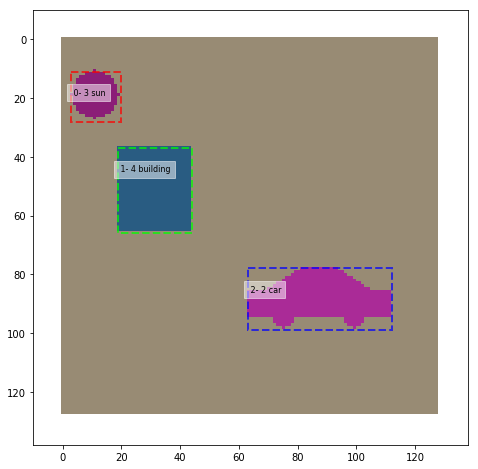

change mrcnn_model.config.VERBOSE from  1  to  0
complete


In [6]:
## high overlaps:   33491, 33498, 33499,
# train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, image_ids = 33492)    
train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, image_ids = 2)    
results= run_mrcnn_evaluate_pipeline(mrcnn_model, dataset_train, train_batch_x, verbose = 0)
print('complete')

###  Run evaluation on multiple images

In [ ]:
# from mrcnn.prep_notebook import build_mrcnn_evaluate_pipeline, run_mrcnn_evaluate_pipeline, get_evaluate_batch
## high overlaps:   33491, 33498, 33499, 481
# for i in range(33480, 33483):   ## [33477]:   ## range(10):
for i in range(485, 500):   ## [33477]:   ## range(10):
    print('image id:', i)
#     train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, image_ids = i)    
#     results= run_mrcnn_evaluate_pipeline(mrcnn_model, dataset_train, train_batch_x, verbose = 0)
    results= run_mrcnn_evaluate_pipeline(mrcnn_model, dataset_train, image_ids= i, verbose = 0)
print('complete')

### Load output from pipeline into variables

In [9]:
print('len of results[mrcnn_output]: ',len(results['mrcnn_output']))
# del mrcnn_detection, rpn_roi_proposals, mrcnn_class, mrcnn_bbox
model_mrcnn_detection    = results['mrcnn_output'][0]          # layer:  0   shape: (1, 100, 6)
model_rpn_roi_proposals  = results['mrcnn_output'][1]          # layer:  1   shape: (1, 1000, 4)
model_mrcnn_class        = results['mrcnn_output'][2]          # layer:  2   shape: (1, 1000, 81)
model_mrcnn_bbox         = results['mrcnn_output'][3]          # layer:  3   shape: (1, 1000, 81, 4)
model_pr_hm              = results['mrcnn_output'][4]          # layer:  4   shape: (1, 256, 256, 81)
model_pr_hm_scores       = results['mrcnn_output'][5]          # layer:  5   shape: (1, 81, 100, 11)

# del input_image, input_image_meta, input_gt_class_ids, input_gt_bboxes #, input_gt_bboxes_norm
input_image              =  results['mrcnn_input'][0]
input_image_meta         =  results['mrcnn_input'][1]
input_gt_class_ids       =  results['mrcnn_input'][2]
input_gt_bboxes          =  results['mrcnn_input'][3]

print('mrcnn_inputs')    
for i in results['mrcnn_input']:    
    print( i.shape)
print('mrcnn_output')
for i in results['mrcnn_output']:
    print( i.shape)
print(' Input image_meta        :', input_image_meta[0,:10])
print(input_gt_class_ids)

len of results[mrcnn_output]:  6
mrcnn_inputs
(1, 128, 128, 3)
(1, 15)
(1, 100)
(1, 100, 4)
mrcnn_output
(1, 64, 7)
(1, 1000, 4)
(1, 1000, 7)
(1, 1000, 7, 4)
(1, 128, 128, 7)
(1, 7, 64, 24)
 Input image_meta        : [  2 128 128   3   0   0 128 128   1   1]
[[3 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]


#### What is returned from run_evaluate_pipeline

In [8]:
print(results.keys())
for i in results.keys():
    print(i, type(results[i]))
# print('image_batch')
# print(results['image_batch'].shape)
print('mrcnn_input')
for i in results['mrcnn_input']:
    print(i.shape)
print('mrcnn_output')
for i in results['mrcnn_output']:
    print(i.shape)    

dict_keys(['image_batch', 'mrcnn_output', 'mrcnn_input'])
image_batch <class 'list'>
mrcnn_output <class 'list'>
mrcnn_input <class 'list'>
mrcnn_input
(1, 128, 128, 3)
(1, 15)
(1, 100)
(1, 100, 4)
mrcnn_output
(1, 64, 7)
(1, 1000, 4)
(1, 1000, 7)
(1, 1000, 7, 4)
(1, 128, 128, 7)
(1, 7, 64, 24)


#### display outputs

In [13]:
float_formatter = lambda x: "%10.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)


In [ ]:
print(model_mrcnn_detection.shape)
print(model_mrcnn_detection[0,:100])
cls_ix = np.where(model_mrcnn_detection[0,:,4]==1)
print(cls_ix)
print(model_mrcnn_detection[0,cls_ix])
# print('mrcnn_class shape:', mrcnn_class.shape)
# print('mrcnn_bbox shape :', mrcnn_bbox.shape)
pr_class_ids = np.unique(model_pr_hm_scores[0,:,:,4]).astype(int).tolist()
print('pr_class_ids', pr_class_ids)
print(model_pr_hm_scores[0, 1, :200,:12])
# print(input_gt_boxes.shape, input_image.shape)
# print('output_rois',model_rpn_roi_proposals.shape, 'deltas ', model_mrcnn_bbox.shape, 'class_ids ', model_mrcnn_class.shape)
# print(model_rpn_roi_proposals[0,:20])
# print(model_rpn_roi_proposals[0,:20]*[h,w,h,w])
# print(input_gt_class_ids)
# print(input_normlzd_gt_bboxes)
# print(input_gt_bboxes_norm.shape)
# print(rpn_roi_proposals.shape)

In [14]:
print(model_mrcnn_detection[0,:20])

[[  104.0000    92.0000   117.0000   109.0000     3.0000     0.9902    -1.0000]
 [   11.0000    19.0000    24.0000    36.0000     3.0000     0.9898     1.0000]
 [   22.0000    11.0000    39.0000    82.0000     6.0000     0.9831     1.0000]
 [   89.0000    46.0000   106.0000   117.0000     6.0000     0.9820    -1.0000]
 [   45.0000    98.0000    63.0000   116.0000     5.0000     0.9749     1.0000]
 [   65.0000    12.0000    83.0000    30.0000     5.0000     0.9741    -1.0000]
 [   37.0000    26.0000    66.0000    51.0000     4.0000     0.9585     1.0000]
 [   62.0000    77.0000    91.0000   102.0000     4.0000     0.9580    -1.0000]
 [   50.0000    30.0000    64.0000    65.0000     2.0000     0.9484    -1.0000]
 [   78.0000    25.0000    99.0000    74.0000     2.0000     0.9477     1.0000]
 [   64.0000    63.0000    78.0000    98.0000     2.0000     0.9471     1.0000]
 [   29.0000    54.0000    50.0000   103.0000     2.0000     0.9469    -1.0000]
 [   60.0000    26.0000    84.0000    31

In [18]:
print(model_mrcnn_detection[0,:20])

[[   11.0000    19.0000    24.0000    36.0000     3.0000     0.9907     1.0000]
 [  104.0000    92.0000   117.0000   109.0000     3.0000     0.9893    -1.0000]
 [   89.0000    46.0000   106.0000   117.0000     6.0000     0.9832    -1.0000]
 [   22.0000    11.0000    39.0000    82.0000     6.0000     0.9824     1.0000]
 [   65.0000    12.0000    83.0000    30.0000     5.0000     0.9758    -1.0000]
 [   45.0000    98.0000    63.0000   116.0000     5.0000     0.9758     1.0000]
 [   62.0000    77.0000    91.0000   102.0000     4.0000     0.9587    -1.0000]
 [   37.0000    26.0000    66.0000    51.0000     4.0000     0.9575     1.0000]
 [   29.0000    54.0000    50.0000   103.0000     2.0000     0.9477    -1.0000]
 [   50.0000    30.0000    64.0000    65.0000     2.0000     0.9475    -1.0000]
 [   64.0000    63.0000    78.0000    98.0000     2.0000     0.9472     1.0000]
 [   78.0000    25.0000    99.0000    74.0000     2.0000     0.9470     1.0000]
 [   50.0000    78.0000    66.0000    83

In [ ]:
GT boxes + fp_boxes with noise - After Sort (Final): (8, 7)
---------------------------------------------------------------------------
[[441.     846.     464.     869.      33.       0.7543   1.    ]
 [560.     155.     583.     178.      33.       0.7541  -1.    ]
 [478.     245.     560.     383.      35.       0.7207  -1.    ]
 [464.     641.     546.     779.      35.       0.7204   1.    ]
 [556.     293.     624.     366.      36.       0.6537   1.    ]
 [413.     571.     488.     653.      36.       0.6528   1.    ]
 [400.     658.     468.     731.      36.       0.6527  -1.    ]
 [536.     371.     611.     453.      36.       0.6526  -1.    ]]

##  run `evaluation_detection_2` over a number of images 

In [29]:
np_format = {}
np_format['float']= lambda x: "%10.4f" % x
np_format['int']= lambda x: "%4d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)


# for i in [24,33492]:  
for i in [0,1,2,3]:  
#     if i % 20 == 0:
    print()
    print('-------------------')
    print('| Image Id: {:5d} |'.format(i))
    print('-------------------')
    eval_batch = get_evaluate_batch(dataset_train, mrcnn_model.config, i, display =  False)
    input_gt_class_ids       =  eval_batch[3][0]
    input_gt_bboxes          =  eval_batch[4][0]
    dets, overlap = add_evaluation_detections_2(input_gt_class_ids, input_gt_bboxes, mrcnn_model.config, mrcnn_model.class_pred_stats)
    if overlap > 0.75:
        print('  image_id: ', i, 'overlap : ' , overlap)


-------------------
| Image Id:     0 |
-------------------

 --------------------------------------------------------------------------------------
 class id :   1
 --------------------------------------------------------------------------------------
  GT boxes :   2     q3 count/score:   1 / 0.9995  q1_count/score:   1 / 0.9720 

  TP Boxes: 	 box 			 orig_score 	 noise 		 new_score
  --------------------------------------------------------------------------------
  0  	 [  60   26   84   31] 		 [    0.9995] 	 [   -0.0007] 	 [    0.9988]
  1  	 [  62   45   78   50] 		 [    0.9720] 	 [   -0.0001] 	 [    0.9719]

  FP Boxes: 	 box 			 orig_score 	 noise 		 new_score
  --------------------------------------------------------------------------------
  0  	 [  44   97   68  102] 		 [    0.9995] 	 [   -0.0009] 	 [    0.9986]
  1  	 [  50   78   66   83] 		 [    0.9720] 	 [    0.0007] 	 [    0.9727]

 --------------------------------------------------------------------------------------


##  `Detection_Evaluation_Layer` step by step

###  Setup tensors to be passed to `detections_target_graph()`
    detections = DetectionEvaluationLayer(config, name="mrcnn_detection") ([rpn_roi_proposals, mrcnn_class, mrcnn_bbox, input_image_meta, input_gt_class_ids, input_gt_boxes])

In [ ]:
float_formatter = lambda x: "%10.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)


In [20]:
from mrcnn.detect_inf_layer import clip_to_window
from mrcnn.utils import flip_bbox, overlaps_graph_np, compute_overlaps, compute_one_iou, compute_1D_iou

In [ ]:
img_idx = 0 
i1, i2, window, _ = utils.parse_image_meta(input_image_meta)
detections        = model_mrcnn_detection[img_idx]
gt_class_ids      = input_gt_class_ids[img_idx]
gt_bboxes         = input_gt_bboxes[img_idx]
image_meta        = input_image_meta[img_idx]
config            = mrcnn_model.config
class_pred_stats  = mrcnn_model.class_pred_stats
print(i1, i2,window)
# print(detections)

### `add_evaluation_detections_1()`  GT boxes and FP GT boxes with average scores + uniform random noise

In [21]:
def add_evaluation_detections_1(gt_class_ids, gt_bboxes, config, class_pred_stats):
    verbose = 1
    height, width   = config.IMAGE_SHAPE[:2]

    ##----------------------------------------------------------------------------
    ##  1.  Filter out boxes with class < 0 : background (0) and Crowds (neg classes)
    ##----------------------------------------------------------------------------
    gt_nz_idxs      = np.where(gt_class_ids > 0)[0]
    gt_nz_class_ids = gt_class_ids[gt_nz_idxs]
    gt_nz_bboxes    = gt_bboxes[gt_nz_idxs]

    # print(' gt_nz_idxs     : ', gt_nz_idxs.shape, '\n', gt_nz_idxs)
    # print(' gt_nz_class_ids: ', gt_nz_class_ids.shape, '\n',  gt_nz_class_ids)
    # print(' gt_nz_bboxes   : ', gt_nz_bboxes.shape   , '\n', gt_nz_bboxes)

    ##----------------------------------------------------------------------------
    ##  2.  Generate False positives using ground truth info 
    ##----------------------------------------------------------------------------
    mod_detections = np.empty((0, 7))
    max_overlap = 0

    ## go through each class, gather the GTs for that class, and create their corrsponding FPs.

    for class_id in np.unique(gt_nz_class_ids) :
        # Pick detections of this class
        gt_class_ixs = np.where(gt_nz_class_ids == class_id)[0]
        tp_bboxes   =  gt_nz_bboxes[gt_class_ixs]

        ## Generate Flip gt_bboxes for this class 
        fp_bboxes   = flip_bbox(tp_bboxes, (height,width),   flip_x = True, flip_y = True)
        
 
        ## Get average score for the current class from predicted_classes information 
        ## Apply Average score for each class from "predictions_info"
        gt_bbox_count = gt_class_ixs.shape[0]
        score_sz = (gt_bbox_count,1)
        scale = 0.001
        
        cls_avg_score   = class_pred_stats['avg'][class_id]  ## np.average(dt_nz[dt_class_ixs,5])
        orig_tp_scores = np.full(score_sz, cls_avg_score)
        orig_fp_scores = np.full(score_sz, cls_avg_score)

        fp_noise = np.round(np.random.uniform(low = -scale, high= scale, size = score_sz) ,4)
        tp_noise = np.round(np.random.uniform(low = -scale, high= scale, size = score_sz) ,4)
        
        tp_scores  = orig_tp_scores + tp_noise
        fp_scores  = orig_fp_scores + fp_noise
#         print('Score size :', score_sz)
#         print('orginal tp_scores: \n', orig_tp_scores)
#         print('oringal fp_scores: \n', orig_fp_scores)
#         print('tp noise     : \n', tp_noise)
#         print('fp noise     : \n', fp_noise)
#         print('new tp_scores: \n', tp_scores)
#         print('new fp_scores: \n', fp_scores)
#         print('tp_bboxes', tp_bboxes.shape)
#         print(tp_bboxes)
#         print('fp_bboxes', fp_bboxes.shape)
#         print(fp_bboxes)
 
        tp_scores  = np.clip(tp_scores, 0.0, 1.0)
        fp_scores  = np.clip(fp_scores, 0.0, 1.0)            
            
            
        if verbose:
            print()
            print(' --------------------------------------------------------------------------------------')
            print(' class id : {:3d}     class avg score: {:.4f}    GT boxes : {:3d}'.format(class_id, cls_avg_score, gt_bbox_count))                
            print(' --------------------------------------------------------------------------------------')
            print('\n  TP Boxes: \t box \t\t\t orig_score \t noise \t\t new_score')
            print(' ','-'*80)
            for i, (box, orig_score, noise, new_score) in enumerate(zip(tp_bboxes, orig_tp_scores, tp_noise, tp_scores)):
                print(' ',i,' \t', box, '\t\t', orig_score, '\t', noise, '\t', new_score)
            print('\n  FP Boxes: \t box \t\t\t orig_score \t noise \t\t new_score')
            print(' ','-'*80)
            for i, (box, orig_score, noise, new_score) in enumerate(zip(fp_bboxes, orig_fp_scores, fp_noise, fp_scores)):
                print(' ',i,' \t', box, '\t\t', orig_score, '\t', noise, '\t', new_score)

        ##  Compute IoU between each GT box and its corresponding FP box. if their overlap > 0.80, reduce the
        ##  boundaries of the FP bbox by multiplying it's coordinates by 0.85, and use this modified FP box
        overlaps = compute_1D_iou(tp_bboxes, fp_bboxes)
        large_ious = np.where(overlaps > 0.80)[0]    
        
        # if there *are* ious > 0.8, modify the reduce the corresponing FP bboxes 
        if len(large_ious) > 0:
            if verbose :
                print('Large IOUS encountered!!!! :', large_ious)
                print('---------------------------------------------')
                print('class id :', class_id, 'class prediction avg:', cls_avg_score)
                print('---------------------------------------------')
                print(' pre adjustment overlaps ', overlaps.shape, ' max: ', overlaps.max() )
                print('---------------------------------------------')
                print(overlaps,'\n')            
                print('fp_bboxes before adjustment ', fp_bboxes.shape)
                print(fp_bboxes[large_ious])
            fp_bboxes[large_ious] = np.rint(fp_bboxes[large_ious].astype(np.float) * 0.85)
            overlaps = compute_1D_iou(tp_bboxes, fp_bboxes)
            if verbose :
                print('fp_bboxes after adjustment ', fp_bboxes.shape)
                print(fp_bboxes[large_ious])
                print(' post adjustment overlaps ', overlaps.shape, ' max: ', overlaps.max() )
                print(' ---------------------------------------------')
                print(overlaps,'\n')

        m_overlap = overlaps.max()
        max_overlap = m_overlap if m_overlap > max_overlap else max_overlap    

        classes   = np.expand_dims(gt_nz_class_ids[gt_class_ixs], axis = -1)
        tp_ind    = np.ones((gt_class_ixs.shape[0],1)) 

        class_tp  = np.concatenate([gt_nz_bboxes[gt_class_ixs], classes, tp_scores, tp_ind] , axis = -1)
        class_fp  = np.concatenate([fp_bboxes, classes, fp_scores, -1 * tp_ind] , axis = -1)
        mod_detections  = np.vstack([mod_detections, class_tp, class_fp])
        # print('classes :', classes.shape, '\n', classes, '\n')    
        # print('scores   :', scores.shape  , '\n', scores)
        # print('tp_ind :', tp_ind.shape, '\n', tp_ind)
        # print('fp_ind :', fp_ind.shape, '\n', fp_ind)
        # print('mod_detections:', mod_detections.shape)
        # print(mod_detections)

    ##----------------------------------------------------------------------------
    ## 10.  Sort by decreasing score and Keep top DETECTION_MAX_INSTANCES detections
    ##----------------------------------------------------------------------------
    roi_count = config.DETECTION_MAX_INSTANCES
    top_ids   = np.argsort(mod_detections[:,5])[::-1][:roi_count]
    if verbose:
        print()
        print('GT boxes + fp boxes with noise, prior to sort:', mod_detections.shape)
        print('-'*75)
        print(mod_detections)    
        print()
        print('GT boxes + fp_boxes with noise - After Sort (Final):', mod_detections.shape)
        print('-'*75)
        print(mod_detections[top_ids])
        print("\n MAX OVERLAP {:.5f}".format(max_overlap))
    
    return mod_detections[top_ids], max_overlap

### `add_evaluation_detections_2()`  (new method of assigning TP/FP bboxes to 1st / 3rd quantiles - 24-01-2019)

In [27]:
def add_evaluation_detections_2(gt_class_ids, gt_bboxes, config, class_pred_stats):
    verbose = 1
    height, width   = config.IMAGE_SHAPE[:2]

    ##----------------------------------------------------------------------------
    ##  1.  Filter out boxes with class < 0 : background (0) and Crowds (neg classes)
    ##----------------------------------------------------------------------------
    gt_nz_idxs      = np.where(gt_class_ids > 0)[0]
    gt_nz_class_ids = gt_class_ids[gt_nz_idxs]
    gt_nz_bboxes    = gt_bboxes[gt_nz_idxs]

    # print(' gt_nz_idxs     : ', gt_nz_idxs.shape, '\n', gt_nz_idxs)
    # print(' gt_nz_class_ids: ', gt_nz_class_ids.shape, '\n',  gt_nz_class_ids)
    # print(' gt_nz_bboxes   : ', gt_nz_bboxes.shape   , '\n', gt_nz_bboxes)

    ##----------------------------------------------------------------------------
    ##  2.  Generate False positives using ground truth info 
    ##----------------------------------------------------------------------------
    mod_detections = np.empty((0, 7))
    max_overlap = 0

    ## go through each class, gather the GTs for that class, and create their corrsponding FPs.

    for class_id in np.unique(gt_nz_class_ids) :
        # Pick detections of this class
        gt_class_ixs = np.where(gt_nz_class_ids == class_id)[0]
        tp_bboxes   =  gt_nz_bboxes[gt_class_ixs]

        ## Generate Flip gt_bboxes for this class 
        fp_bboxes   = flip_bbox(tp_bboxes, (height,width),   flip_x = True, flip_y = True)
        
 
        ## Get average score for the current class from predicted_classes information 
        ## Apply Average score for each class from "predictions_info"
        gt_bbox_count = gt_class_ixs.shape[0]
        score_sz = (gt_bbox_count,1)
        scale = 0.001
        
        q1_count = gt_bbox_count // 2 
        q3_count = gt_bbox_count - q1_count
        q1_score = class_pred_stats['pct'][class_id][0]   # 1st quantile 
        q3_score = class_pred_stats['pct'][class_id][2]   # 3rd quantile
        orig_tp_scores = np.zeros(score_sz)
        orig_fp_scores = np.zeros(score_sz)
        orig_tp_scores[:q3_count] = q3_score    
        orig_tp_scores[q3_count:] = q1_score
        orig_fp_scores[:q3_count] = q3_score    
        orig_fp_scores[q3_count:] = q1_score                        
            
        fp_noise = np.round(np.random.uniform(low = -scale, high= scale, size = score_sz) ,4)
        tp_noise = np.round(np.random.uniform(low = -scale, high= scale, size = score_sz) ,4)
        
        tp_scores  = orig_tp_scores + tp_noise
        fp_scores  = orig_fp_scores + fp_noise

        tp_scores  = np.clip(tp_scores, 0.0, 1.0)
        fp_scores  = np.clip(fp_scores, 0.0, 1.0)            
        
#         print('Score size :', score_sz)
#         print('orginal tp_scores: \n', orig_tp_scores)
#         print('oringal fp_scores: \n', orig_fp_scores)
#         print('tp noise     : \n', tp_noise)
#         print('fp noise     : \n', fp_noise)
#         print('new tp_scores: \n', tp_scores)
#         print('new fp_scores: \n', fp_scores)
#         print('tp_bboxes', tp_bboxes.shape)
#         print(tp_bboxes)
#         print('fp_bboxes', fp_bboxes.shape)
#         print(fp_bboxes)            
            
        if verbose:
            print()
            print(' --------------------------------------------------------------------------------------')
            print(' class id : {:3d}'.format(class_id))                
            print(' --------------------------------------------------------------------------------------')
            #  print(' class id : {:3d}     q3 score: {:.4f}  q1_score: {:.4f}'.format(class_id, q3_score, q1_score))                
            print('  GT boxes : {:3d}     q3 count/score: {:3d} / {:.4f}  q1_count/score: {:3d} / {:.4f} '.format(
                    gt_bbox_count, q3_count, q3_score, q1_count, q1_score))

            print('\n  TP Boxes: \t box \t\t\t orig_score \t noise \t\t new_score')
            print(' ','-'*80)
            for i, (box, orig_score, noise, new_score) in enumerate(zip(tp_bboxes, orig_tp_scores, tp_noise, tp_scores)):
                print(' ',i,' \t', box, '\t\t', orig_score, '\t', noise, '\t', new_score)
            print('\n  FP Boxes: \t box \t\t\t orig_score \t noise \t\t new_score')
            print(' ','-'*80)
            for i, (box, orig_score, noise, new_score) in enumerate(zip(fp_bboxes, orig_fp_scores, fp_noise, fp_scores)):
                print(' ',i,' \t', box, '\t\t', orig_score, '\t', noise, '\t', new_score)

        ##  Compute IoU between each GT box and its corresponding FP box. if their overlap > 0.80, reduce the
        ##  boundaries of the FP bbox by multiplying it's coordinates by 0.85, and use this modified FP box
        overlaps = compute_1D_iou(tp_bboxes, fp_bboxes)
        large_ious = np.where(overlaps > 0.80)[0]    
        
        # if there *are* ious > 0.8, modify the reduce the corresponing FP bboxes 
        if len(large_ious) > 0:
            if verbose :
                print('Large IOUS encountered!!!! :', large_ious)
                print('---------------------------------------------')
                print('class id :', class_id, 'class prediction avg:', cls_tp_score, cls_fp_score)
                print('---------------------------------------------')
                print(' pre adjustment overlaps ', overlaps.shape, ' max: ', overlaps.max() )
                print('---------------------------------------------')
                print(overlaps,'\n')            
                print('fp_bboxes before adjustment ', fp_bboxes.shape)
                print(fp_bboxes[large_ious])
            fp_bboxes[large_ious] = np.rint(fp_bboxes[large_ious].astype(np.float) * 0.85)
            overlaps = compute_1D_iou(tp_bboxes, fp_bboxes)
            if verbose :
                print('fp_bboxes after adjustment ', fp_bboxes.shape)
                print(fp_bboxes[large_ious])
                print(' post adjustment overlaps ', overlaps.shape, ' max: ', overlaps.max() )
                print(' ---------------------------------------------')
                print(overlaps,'\n')

        m_overlap = overlaps.max()
        max_overlap = m_overlap if m_overlap > max_overlap else max_overlap    

        classes   = np.expand_dims(gt_nz_class_ids[gt_class_ixs], axis = -1)
#         tp_scores = np.ones((gt_class_ixs.shape[0],1)) * cls_tp_score
#         fp_scores = np.ones((gt_class_ixs.shape[0],1)) * cls_fp_score
    

                            
        tp_ind    = np.ones((gt_class_ixs.shape[0],1)) 

        class_tp  = np.concatenate([gt_nz_bboxes[gt_class_ixs], classes, tp_scores, tp_ind] , axis = -1)
        class_fp  = np.concatenate([fp_bboxes, classes, fp_scores, -1 * tp_ind] , axis = -1)
        mod_detections  = np.vstack([mod_detections, class_tp, class_fp])
        # print('classes :', classes.shape, '\n', classes, '\n')    
        # print('scores   :', scores.shape  , '\n', scores)
        # print('tp_ind :', tp_ind.shape, '\n', tp_ind)
        # print('fp_ind :', fp_ind.shape, '\n', fp_ind)
        # print('mod_detections:', mod_detections.shape)
        # print(mod_detections)

    ##----------------------------------------------------------------------------
    ## 10.  Sort by decreasing score and Keep top DETECTION_MAX_INSTANCES detections
    ##----------------------------------------------------------------------------
    roi_count = config.DETECTION_MAX_INSTANCES
    top_ids   = np.argsort(mod_detections[:,5])[::-1][:roi_count]
    if verbose:
        print()
        print('GT boxes + fp boxes with noise, prior to sort:', mod_detections.shape)
        print('-'*75)
        print(mod_detections)    
        print()
        print('GT boxes + fp_boxes with noise - After Sort (Final):', mod_detections.shape)
        print('-'*75)
        print(mod_detections[top_ids])
        print("\n MAX OVERLAP {:.5f}".format(max_overlap))
    
    return mod_detections[top_ids], max_overlap

In [ ]:

print('bbox count    quantile 3   quantile1 ')
# print('      {:3d}          {:3d}         {:3d}'
print('-'*50)
for gt_bbox_count in [1,2,3,4,5,6,7,8,9,10]:
    box_list = [chr(65+i) for i in range(gt_bbox_count)]
    q1_count = gt_bbox_count // 2 
    q3_count = gt_bbox_count - q1_count
    print('   {:3d}          {:3d}         {:3d}    {}   {} '.format(gt_bbox_count, q3_count, q1_count,box_list[:q3_count], box_list[q3_count:]))

In [ ]:
[chr(65+i) for i in range(10)]

### `add_evaluation_detections - 1` Add False detections to detections generated by MRCNN classification branch
This routine takes the GT bboxes, converts them to FPs and adds them to the Detections made by the FPN layer.

####  Stack `refined_rois`, `class_ids`, and `class_scores` into `result`

In [ ]:
##----------------------------------------------------------------------------
## 11.  Arrange output as [N, (y1, x1, y2, x2, class_id, score)]
##      Coordinates are in image domain.
##----------------------------------------------------------------------------
result = np.hstack((refined_rois[keep_top_detections],
                    class_ids   [keep_top_detections][..., np.newaxis],
                    class_scores[keep_top_detections][..., np.newaxis]))

print(result.shape)
print(result)

In [ ]:
results = []
final_rois, final_class_ids, final_scores = mrcnn_model.unmold_detections(result, image.shape, window)    
results.append({
    "rois"        : final_rois,
    "class_ids"   : final_class_ids,
    "scores"      : final_scores
})
# results = mrcnn_model.detect([image], verbose=1)
r = results[0]
 
print('  rois       : ', r['rois'])
print('  class ids  : ', r['class_ids'])
print('  scores     : ', r['scores'])
print('  detections count: ', r['class_ids'].shape[0], result.shape[0])

####  display`fp_additions`

In [ ]:
image = utils.unmold_image(input_image[0], mrcnn_model.config)
#print(input_image.shape)
# p1 = rois * [1024,1024,1024,1024]
 
# visualize.draw_rois_with_refinements(image, p1, refined_rois,class_ids, class_names,limit = 10, random = False )
# visualize.draw_rois_with_refinements(image, p1, refined_rois,class_ids, class_names,ids=[6,7,8,9]) 
# bbox_ids = list(range(0,500))
# print(' Max score in bboxIds: ',np.max(class_scores[bbox_ids]), ' Min Score: ', np.min(class_scores[bbox_ids]))
# print(image_meta) 
# visualize.draw_rois(image, detections[:,:4], detections[:,4].astype(np.int), class_names,  limit=10, display_bg= True , bbox_ids = [ 1,7,12, 16, 17, 19])
# visualize.draw_rois(image, gt_nz_bboxes, gt_nz_class_ids, class_names,  limit=10,  display_bg= True, bbox_ids = [0,1,2])
visualize.draw_rois(image, fp_additions[:,:4], fp_additions[:,4].astype(np.int), class_names,  limit=10,  display_bg= True, bbox_ids = [0,1,2,3,4,5,6])
# visualize.draw_rois(image, gt_nz_bboxes_flipped, gt_nz_class_ids, class_names,  limit=10, bbox_ids= [ 7], display_bg= True)
  

##  Read Predict_classes files

In [ ]:
import pickle
with open("E:\\git_projs\\MRCNN3\\train_coco\\predicted_classes_info.pkl", 'rb') as infile:
    class_prediction_info = pickle.load(infile)
 
# print(type(class_prediction_info))    
# pp.pprint(load_gt_info)
class_prediction_avg = [cls['avg'] for cls in class_prediction_info]
# pp.pprint(class_prediction_avg)    
# for cls in class_prediction_info:
for avg, cls in zip(class_prediction_avg, class_prediction_info):
    print('  {:2d} {:25s} bboxes: {:6d}  avg: {:7.4f}   avg: {:7.4f}'.format(cls['id'], cls['name'], len(cls['bboxes']), cls['avg'], avg))
    assert i == j['avg'], 'mismtach between class_prediction_avg and class_prediction_info.'


## Display Heatmaps

In [14]:
img_id = 0
print('Image id: ',img_id, ' Coco ID: ', dataset_train.image_info[img_id]['id'])
# gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_hm_scores[img_id,:,:,4]).astype(int).tolist()
# print('Image : {}  Ground Truth ClassIds: {}'.format(img_id, gt_class_ids))
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

Image id:  0  Coco ID:  0
Image : 0  Predicted    ClassIds: [0, 2, 3, 4]


#### Display Bounding Boxers and Heatmap

In [ ]:
# print(r['scores'].shape)
# r = results[0]

In [66]:
print(model_pr_hm_scores.shape, model_pr_hm_scores.ndim, model_mrcnn_detection.shape)
pr_scores_by_img = utils.byclass_to_byimage_np(model_pr_hm_scores[0],7)
print(pr_scores_by_img.shape)
print(pr_scores_by_img[:,:10]) 
print(input_image.shape)
print(type(train_batch_x))
for i in train_batch_x :
    print(type(i))
# pr_scores_by_img2 = utils.byclass_to_byimage_np(model_pr_hm_scores[0,1],7)
# print(pr_scores_by_img2.shape)
# print(pr_scores_by_img2[:,:10]) 

(1, 7, 64, 24) 4 (1, 64, 7)
(6, 24)
[[ 29.      16.      50.      65.       2.       0.9482  -1.      60.       1.       0.9987]
 [ 78.      63.      99.     112.       2.       0.9474   1.      59.       0.9992   0.9987]
 [ 11.       3.      28.      20.       3.       0.9902   1.      64.       1.       0.9923]
 [100.     108.     117.     125.       3.       0.9896  -1.      63.       0.9994   0.9923]
 [ 62.      84.      91.     109.       4.       0.9591  -1.      62.       1.       0.9994]
 [ 37.      19.      66.      44.       4.       0.9583   1.      61.       0.9992   0.9994]]
(1, 128, 128, 3)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


 Image_id    :  2  Reference:  [('sun', (139, 30, 119), (11, 19, 8, 8)), ('building', (41, 92, 130), (31, 51, 12, 14)), ('car', (170, 43, 151), (87, 90, 24, 12))] Coco Id: 2
 Image meta  :  [  2 128 128   3   0   0 128 128   1   1]
 Class ids   :  (3,)    [3 4 2]
 Class Names :  ['sun', 'building', 'car']


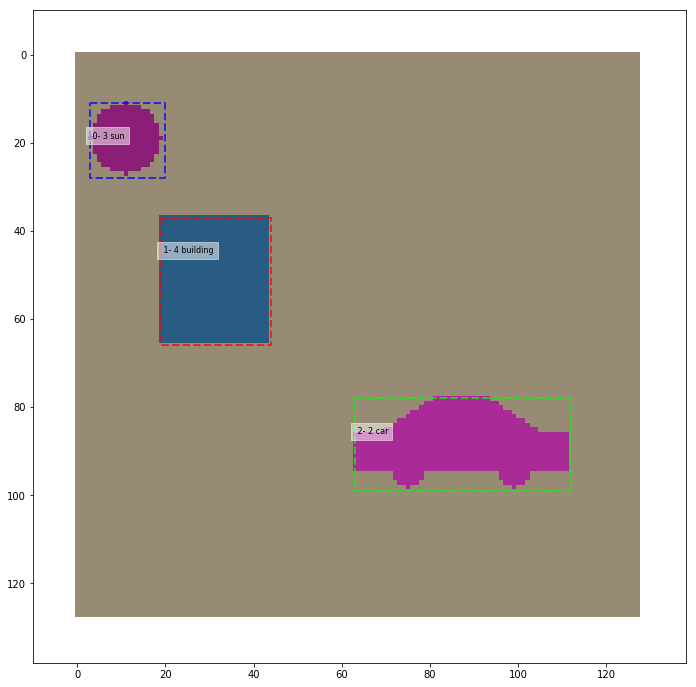

In [69]:
visualize.display_image_gt(dataset_train, mrcnn_model.config, 2)

 display_instances() : Image shape:  (128, 128, 3)


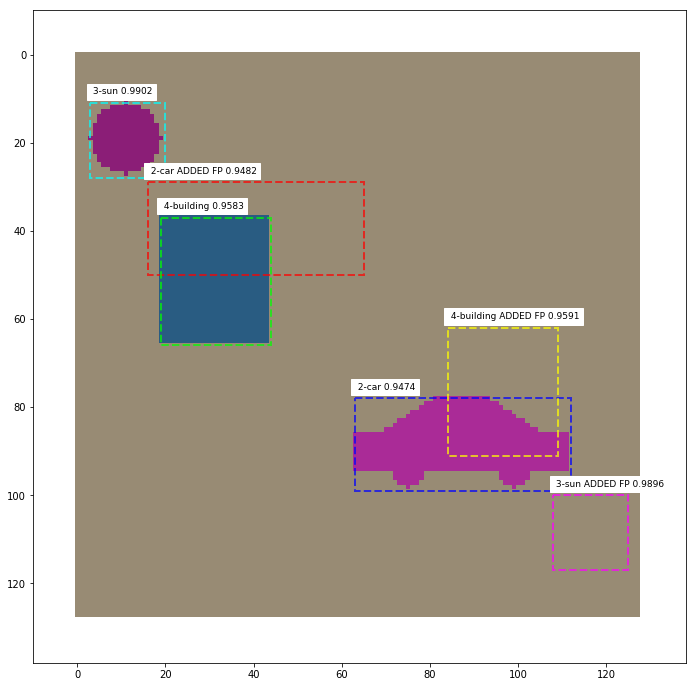

In [72]:
# visualize.display_instances(image, r['rois'], r['class_ids'], class_names, r['scores'])
visualize.display_instances_from_prscores(train_batch_x[0][0], pr_scores_by_img, class_names)

In [ ]:
from mrcnn.visualize import display_heatmaps_mrcnn
# np.unique(r['class_ids'])
display_heatmaps_mrcnn([molded_images, image_metas], [r['pr_hm'], r['pr_hm_scores']], 0, class_ids = r['class_ids'], 
                            class_names = class_names, config = mrcnn_config)


### 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [ ]:
img_id = 0
fig = visualize.plot_2d_heatmap(model_pr_hm , model_pr_hm_scores, img_id, pr_class_ids, 
                          class_names = class_names, columns = 1, scale = 4, scaling = 'all' )

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
# fig = visualize.plot_2d_heatmap(model_pr_hm, model_pr_hm_scores, img_id,
#                                 class_names = class_names, columns = 3, scale = 4, scaling = 'all')

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_pr_hm, img_id, pr_class_ids, class_names = class_names, zlim = 'class' , scaling = 'none')